In [1]:
import numpy as np
import scipy as sc
from scipy.stats import logistic, norm
from scipy.optimize import minimize
import matplotlib.pyplot as plt

In [2]:
'''
This file contains sample code about how to use Gauss–Hermite quadrature to compute a 
specific type of integral numerically.

The general form of this type of integral is:( see https://en.wikipedia.org/wiki/Gauss%E2%80%93Hermite_quadrature 
for more details)

F = int_{ -inf}^{+inf} e^{-x*x) f(x) dx,  (1)

in which we're calculating the integral of f(x) in the range ( -inf, +inf) weighted by e^(-x*x ).
Note that for f(x) being polynomial function, this integral is guaranteed to converge. But for some others 
convergence is not guaranteed.
'''

import numpy as np


def gass_hermite_quad(f, degree):
    '''
    Calculate the integral (1) numerically.
    :param f: target function, takes a array as input x = [x0, x1,...,xn], and return a array of function 
    values f(x) = [f(x0),f(x1), ..., f(xn)]
    :param degree: integer, >=1, number of points
    :return:
    '''

    points, weights = np.polynomial.hermite.hermgauss(degree)

    #function values at given points
    f_x = f(points)

    #weighted sum of function values
    F = np.sum(f_x  * weights)

    return F

In [3]:
if __name__ == '__main__':

    # Example 1, f(x) = x^2, degree = 3, whose closed form solution is sqrt(pi) / 2
    def x_square(x):
        return x* x

    # Example 2, f(x) = x * sin x, degree = 10, whose closed form solution is sqrt( pi) / e^(1/4) / 2)
    def my_func(x):
        return x * np.sin(x)  

In [4]:
F = gass_hermite_quad(x_square, 3)
print(F, np.sqrt(np.pi)/2)

0.886226925452758 0.8862269254527579


In [5]:
F = gass_hermite_quad(my_func, degree=10)
print(F, np.sqrt(np.pi)/np.e**(1/4)/2)

0.6901942235216169 0.6901942235215714


### Question 1, Part (a)

In [6]:
alpha = 1
a = 10 
b = 3

In [7]:
sigma = lambda x: logistic.cdf(a*x+b)

In [8]:
sigma_ = lambda x: 1/np.sqrt(alpha)*logistic.cdf(a*x/np.sqrt(alpha)+b)

In [9]:
G = gass_hermite_quad(sigma_, degree=300)

In [10]:
print(G)

1.1689795217645669


### Question 1: Part (b)

In [11]:
nlp = lambda x: alpha*x*x -np.log(sigma(x))

In [12]:
d_nlp = lambda x : 2*alpha*x - a *(1-sigma(x))

In [13]:
dd_nlp = lambda x: 2*alpha +a*a*sigma(x)*(1-sigma(x))

In [14]:
x =0
model_Q1b = minimize(nlp, x, method = 'L-BFGS-B', jac = d_nlp )

In [15]:
mu_Laplace = model_Q1b.x
mu_Laplace

array([0.09471726])

In [16]:
Sigma_inv = dd_nlp(mu_Laplace)
Sigma_Laplace = np.sqrt(1/Sigma_inv)
Sigma_Laplace

array([0.50908828])

In [17]:
Sigma_inv

array([3.85845823])

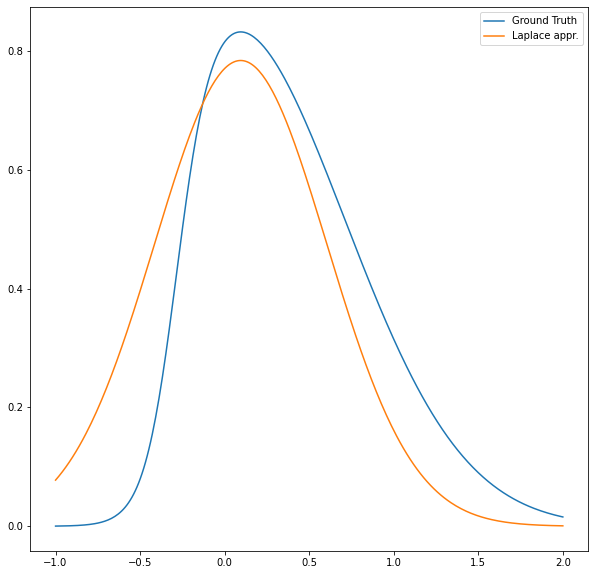

In [18]:
X = np.linspace(-1, 2, 300)
plt.figure(figsize=(10, 10))
plt.plot(X, 1/G *np.exp(-nlp(X)), label = 'Ground Truth')
plt.plot(X, norm.pdf(X, mu_Laplace, Sigma_Laplace), label = 'Laplace appr.')
plt.legend()
plt.show()

### Question 1: Part (c)

In [19]:
def Lambda(x):
    return (logistic.cdf(x)- 1/2)/(2*x)

In [20]:
def EM_Q1(x_0, tolerance = 1e-8):
    
    while True:
        l = Lambda(x_0)
        
        # E-step:
        
        sigma_squared = 1/(2*alpha + 2*a*a*l)
        
        mu = sigma_squared *(a/2 - 2*a*b*l)
        
        
        #M_step:
        x_1 = np.sqrt((a*mu+b)**2 + a*a*sigma_squared)
        
        if np.abs(x_1-x_0) <tolerance:
            return mu, sigma_squared
        else:
            x_0 = x_1

In [21]:
mu_variational,sigma_squared = EM_Q1(1)
Sigma_variational = np.sqrt(sigma_squared)
mu_variational, Sigma_variational

(0.306888172193115, 0.32920037650590206)

In [22]:
mu_Laplace, Sigma_Laplace

(array([0.09471726]), array([0.50908828]))

In [23]:
X = np.linspace(-5, 5, 300)

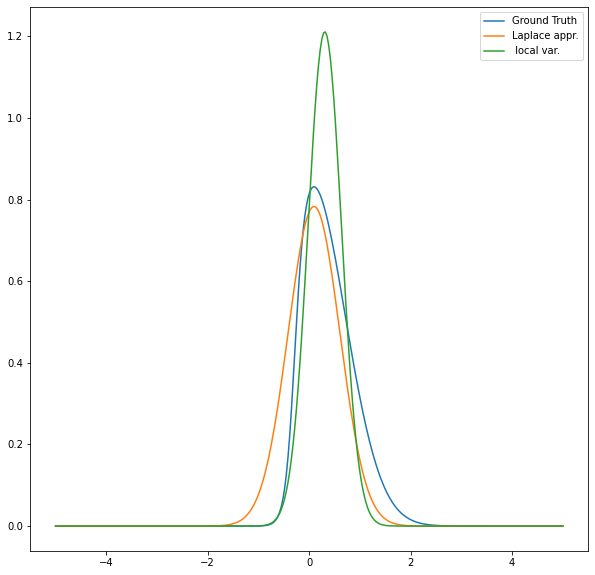

In [24]:
plt.figure(figsize=(10, 10))
plt.plot(X, 1/G *np.exp(-nlp(X)), label = 'Ground Truth')
plt.plot(X, norm.pdf(X, mu_Laplace, Sigma_Laplace), label = 'Laplace appr.')
plt.plot(X, norm.pdf(X, mu_variational, Sigma_variational), label = ' local var.')
plt.legend()
plt.show()